In [1]:
from matplotlib import pyplot as plt
from math import  ceil


def penga(n, C, E, M):

    n = sorted(n)
    h_min, h_max = n[0], n[-1]

    if h_max == h_min:
        return 0


    total_area = len(n) * h_max
    n1 = sum(n) 
    n2 = total_area - n1
    n3 = (n1 + n2) / 2
    n1 -= len(n) * h_min


    action = {
        "M": M,
        "C": C,
        "E": E,
    }

    actions = ""

    while h_max != h_min:
        
        plt.bar(range(len(n)), n)
        
        plt.show()
        n3 = ceil(n1 / len(n))
        print(f"{n1=}\n{n2=}\n{n3=}\n")
        

        c1 = n1 * E <= n2 * C
        c2 = n1 * E <= n3 * M
        c3 = n2 * C >= n3 * M and h_max > h_min+1

        
        if c1:
            if c2:
                actions += "E"
            elif c3:
                actions += "M"
            else:
                actions += "C"
        elif c3:
            actions += "M"
        else:
            actions += "C"

        a = actions[-1]
        if a == "E":

            if n[-1] != n[-2]:
                n[-1] -= 1
                n1 -= 1
                n2 -= len(n) - 1
            else:
                i = -1
                v = n[-1]
                for k in range(-1, -(len(n) - 1), -1):
                    if n[k-1] != n[k]:
                        i = k
                        break
                n[i] -= 1
                n1 -= 1
                n2 += 1

        if a == "C":

            if n[0] != n[1]:
                n[0] += 1

            else:
                i = 0
                for k in range(len(n) - 1):
                    if n[k+1] != n[k]:
                        i = k
                        break
                n[k] += 1

            n1 += 1
            n2 -= 1

        if a == "M":
            assert n[0] + 1 < n[-1]
            if n[-1] != n[-2]:
                n[-1] -= 1
                n1 -= 1
                n2 -= len(n) - 1
            else:
                i = -1
                v = n[-1]
                for k in range(-1, -(len(n) - 1), -1):
                    if n[k-1] != n[k]:
                        i = k
                        break
                n[i] -= 1
                n1 -= 1
                n2 += 1

            if n[0] != n[1]:
                n[0] += 1

            else:
                i = 0
                for k in range(len(n) - 1):
                    if n[k+1] != n[k]:
                        i = k
                        break
                n[k] += 1

            n1 += 1
            n2 -= 1

        print(a)

        # n = sorted(n)
        h_min, h_max = n[0], n[-1]

    costo = sum(action[i] for i in actions)

    return costo, actions




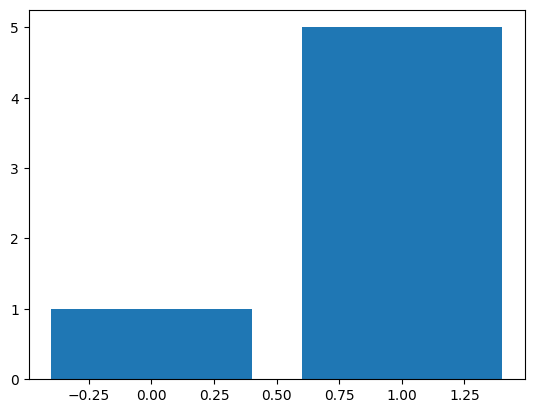

n1=4
n2=4
n3=2

E


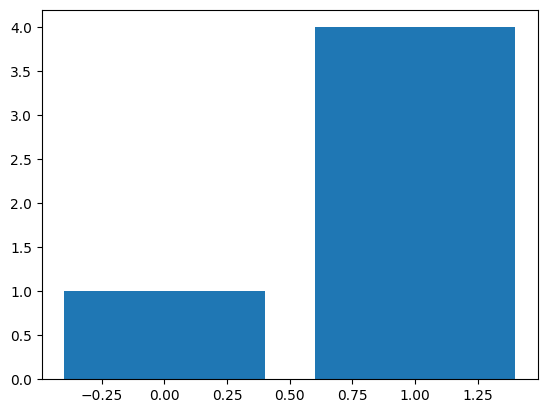

n1=3
n2=3
n3=2

E


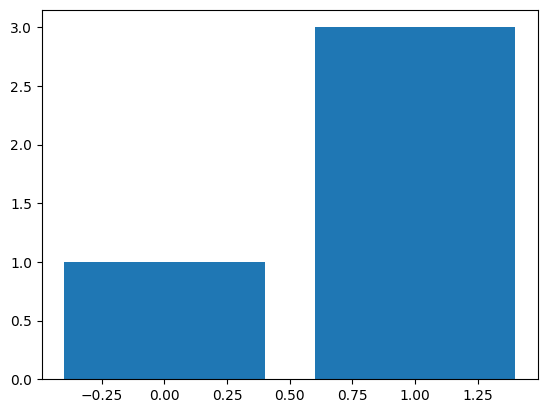

n1=2
n2=2
n3=1

E


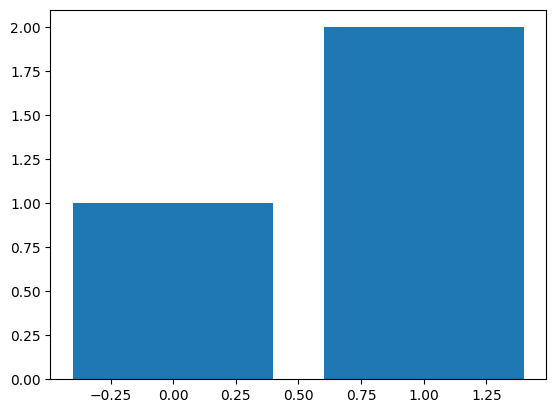

n1=1
n2=1
n3=1

E
4
EEEE


In [2]:
n_test = [5, 1]
C = 2
M = 12
E = 1

c, a = penga(n_test, C, E, M)

print(c)
print(a)


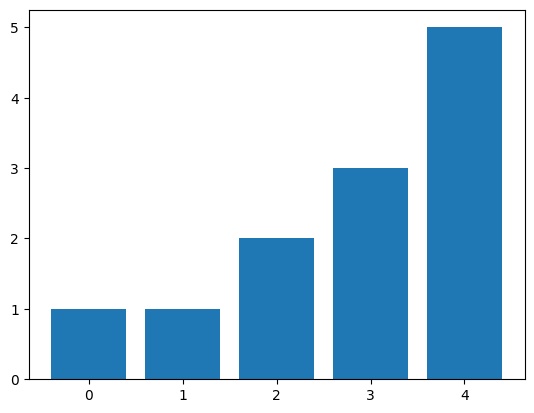

n1=7
n2=13
n3=2

M


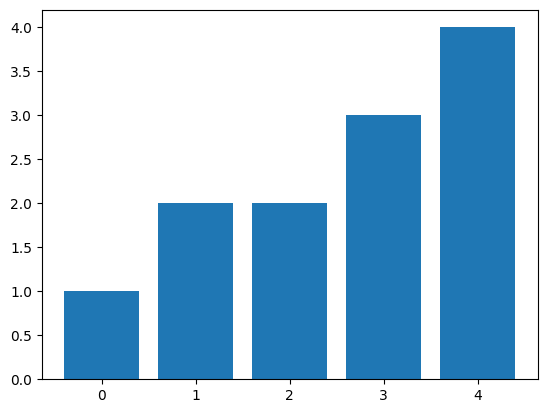

n1=7
n2=8
n3=2

M


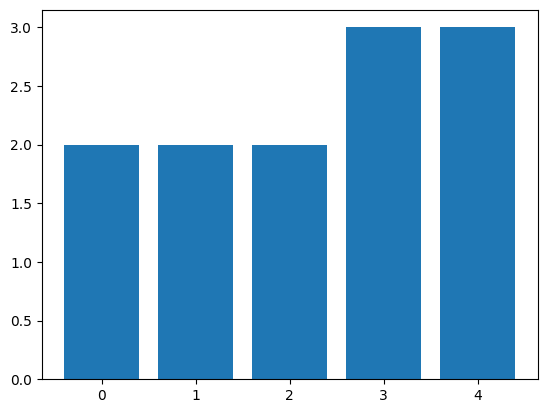

n1=7
n2=3
n3=2

C


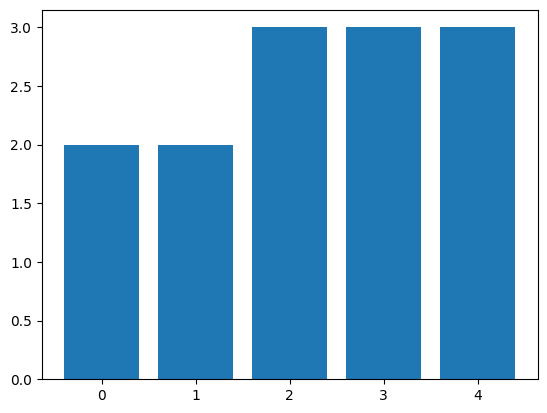

n1=8
n2=2
n3=2

C


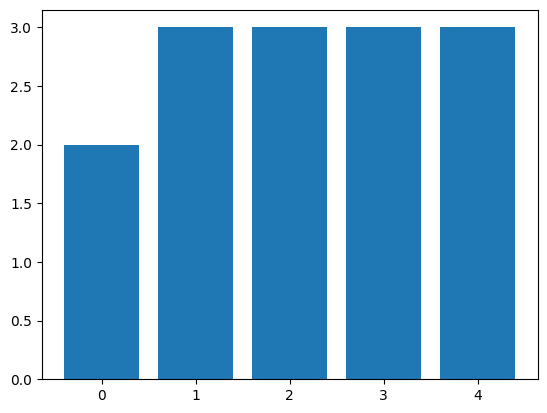

n1=9
n2=1
n3=2

C
80
MMCCC


In [3]:
n_test = [5, 1, 2, 3, 1]
C = 20
M = 10
E = 5

c, a = penga(n_test, C, E, M)

print(c)
print(a)


In [4]:
def penga2(h, C, E, M):

    n = len(h)
    max_h = max(h)
    f = [[float('inf')] * (max_h + 1) for _ in range(n+1) ]
    for i in range(max_h + 1):
        f[0][i] = 0

    for i in range(1, n+1):
        for j in range(max_h + 1):
            if h[i-1] > j:
                f[i][j] = E * (h[i-1] - j) + f[i-1][j]
            elif h[i-1] < j:
                f[i][j] = C * (j - h[i-1]) + f[i-1][j]
                count = 0
                for k in range(i, n):
                    if h[k] > (h[i-1] + 1):
                        count += h[k] - (h[i-1] + 1)
                    if count >= (j - h[i-1]):
                        f[i][j] = min(f[i][j], (j - h[i-1]) *M + f[i-1][j] )
                        break
            else:
                f[i][j] = f[i-1][j]


    return f

            
    

In [5]:
n_test = [3, 2, 1, 5]
C = 3
M = 1
E = 10

c = penga2(n_test, C, E, M)
print(c)

print(min(c[len(n_test)]))

[[0, 0, 0, 0, 0, 0], [30, 20, 10, 0, 1, 6], [50, 30, 10, 1, 3, 15], [60, 30, 11, 3, 6, 27], [110, 70, 41, 23, 16, 27]]
16


In [6]:
def jenga(h, C, E, M):
    n = len(h)
    max_h = max(h)
    dp = [[float('inf')]*(max_h+1) for _ in range(n+1)]
    for i in range(max_h+1):
        dp[0][i] = 0

    for i in range(1, n+1):
        for j in range(max_h+1):
            for k in range(max(j, h[i-1])+1):
                cost = float('inf')
                if k > h[i-1]:
                    cost = C*(k-h[i-1])
                elif k < h[i-1]:
                    cost = E*(h[i-1]-k)
                for l in range(n):
                    if l != i-1 and k <= h[l]:
                        cost = min(cost, M)
                dp[i][k] = min(dp[i][k], cost+dp[i-1][j])

    return dp

In [7]:
n_test = [3, 2, 1, 5]
C = 3
M = 1
E = 10

c = jenga(n_test, C, E, M)
print(c)

print(min(c[len(n_test)]))

[[0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2], [3, 3, 3, 3, 3, 3], [4, 4, 4, 4, 13, inf]]
4


In [24]:
from networkx import Graph
from networkx.algorithms.traversal import dfs_tree
from networkx.algorithms.shortest_paths import shortest_path
from math import ceil, floor


class State:

    def __init__(self, columns, cost, action=None, parent=None) -> None:
        self.columns = columns
        self.action = action
        self.cost = cost
        self.h_max = self.columns[-1]
        self.h_min = self.columns[0]
        self.parent = parent

    def new_state(self, action, C, E, M):
        new_state = list(self.columns)
        assert action is not None
        
        if action[0] == 'C':
            new_state[action[1]] += 1
            if new_state[action[1]] > new_state[-1]:
                new_state[action[1]], new_state[-1] = new_state[-1], new_state[action[1]]
            cost = self.cost + C
            return State(tuple(new_state), cost, action, parent=self)
        elif action[0] == 'E':
            new_state[action[1]] -= 1 
            if new_state[action[1]] < new_state[0]:
                new_state[action[1]], new_state[0] = new_state[0], new_state[action[1]]
            cost = self.cost + E
            return State(tuple(new_state), cost, action, parent=self)
        else: # M
            s = action[1]
            d = action[2]
            new_state[s] -= 1 
            new_state[d] += 1 
            cost = self.cost + M
            return State(tuple(sorted(new_state)), cost, action, parent=self)
        
    def valid(self):
        return self.h_max == self.h_min
        
    def get_actions(self):
        actions = []
        # C Aumentar el mínimo
        c_i = 0
        actions.append(('C', c_i))

        # E eliminar del máximo
        e_i = -1
        actions.append(('E', e_i))

        # M mover maximo a minimo
        if self.columns[e_i] > (self.columns[c_i] + 1):
            actions.append(('M', e_i, c_i))

        return actions
    
    def __str__(self) -> str:
        prefix = ''
        if self.action:
            prefix = self.action[0]
        return prefix + f"{self.columns} | {self.cost}"

    def __repr__(self) -> str:
        return str(self)



def jenga(n, C, E, M):
    assert isinstance(n, tuple)
    
    n = sorted(n)
    root = State(n, 0)
    current_states = [root]
    h_max = max(n)
    h_min = min(n)
    total_initial = sum(n)
    l_n = len(n)
    mean_h_f = floor(total_initial / l_n)
    mean_h_c = ceil(total_initial / l_n)
    e_mean = total_initial - mean_h_f * l_n
    c_mean = mean_h_c * l_n - total_initial
    
    if e_mean * E < c_mean * C:
        m = sum(i - mean_h_f for i in n if i > mean_h_f + 1)
    else:
        m = sum(i - mean_h_c for i in n if i > mean_h_c + 1)

    # print(f"{mean_h_c=}, {mean_h_f=}, {e_mean=}, {c_mean=}, {m=}")

    E_cost = E * (total_initial - l_n * h_min)
    C_cost =  C * (h_max * l_n - total_initial)
    M_cost = m * M + min(e_mean * E, c_mean * C)
    min_cost = min(E_cost, C_cost, M_cost)
    # print(min_cost)
    final_states = []
    counter = l_n**2
    while len(current_states) and counter:
        counter -= 1
        state = current_states.pop(0)
        

        if state.valid():
            if state.cost <= min_cost:
                min_cost = state.cost
                final_states.append(state)
        else:
            actions = state.get_actions()
            for action in actions:
                new_state = state.new_state(action, C, E, M)
                if new_state.cost > min_cost:
                    continue
                current_states.append(new_state)
                
                
    return min_cost, final_states



In [25]:
n_test = (3, 2, 1, 5)
C = 3
M = 1
E = 10

min_cost, final_states = jenga(n_test, C, E, M)




In [29]:
def get_path(state):
    current = state
    states = []
    while current.parent != None:
        states.append(current)
        current = current.parent
    states.append(current)
    return reversed(states)


In [30]:
for state in final_states:
    print(list(get_path(state)))

[[1, 2, 3, 5] | 0, C(2, 2, 3, 5) | 3, M(2, 3, 3, 4) | 4, M(3, 3, 3, 3) | 5]
[[1, 2, 3, 5] | 0, M(2, 2, 3, 4) | 1, M(2, 3, 3, 3) | 2, C(3, 3, 3, 3) | 5]


In [31]:
def jenga_cost(n, C, E, M):
    
    h_max = max(n)
    h_min = min(n)
    total_initial = sum(n)
    l_n = len(n)
    mean_h_f = floor(total_initial / l_n)
    mean_h_c = ceil(total_initial / l_n)
    e_mean = total_initial - mean_h_f * l_n
    c_mean = mean_h_c * l_n - total_initial
    
    if e_mean * E < c_mean * C:
        m = sum(i - mean_h_f for i in n if i > mean_h_f + 1)
    else:
        m = sum(i - mean_h_c for i in n if i > mean_h_c + 1)

    E_cost = E * (total_initial - l_n * h_min)
    C_cost =  C * (h_max * l_n - total_initial)
    M_cost = m * M + min(e_mean * E, c_mean * C)
    min_cost = min(E_cost, C_cost, M_cost)
    return min_cost

In [32]:
import random

def get_random_problem_easy():
    n = random.randint(1, 100)
    columns = (random.randint(0, 100) for _ in range(n))
    C = random.randint(0, 10)
    E = random.randint(0, 10)
    M = random.randint(0, 10)
    return tuple(columns), C, E, M

def get_random_problem():
    n = random.randint(0, 10)
    columns = (random.randint(0, 100) for _ in range(n))
    C = random.randint(0, 100)
    E = random.randint(0, 100)
    M = random.randint(0, 100)
    return tuple(columns), C, E, M

In [33]:
for i in range(1000):
    n, C, E, M = get_random_problem_easy()
    print(f"{i+1}: {C=} {E=} {M=} n={len(n)}")
    # print(n)
    sol_cost = jenga_cost(n, C, E, M)
    sol_graph, states = jenga(n, C, E, M)

    
    if sol_cost == sol_graph:
        print("Succed. Cost: ", sol_cost)
    else:
        print(f"Fail. {sol_cost=} {sol_graph=}")

1: C=4 E=5 M=5 n=77
Succed. Cost:  5085
2: C=3 E=0 M=10 n=49
Succed. Cost:  0
3: C=6 E=7 M=7 n=7
Succed. Cost:  543
4: C=10 E=8 M=7 n=26
Succed. Cost:  2175
5: C=10 E=4 M=7 n=98
Succed. Cost:  9213
6: C=1 E=9 M=1 n=59
Succed. Cost:  768
7: C=7 E=8 M=1 n=71
Succed. Cost:  1020
8: C=2 E=6 M=5 n=60
Succed. Cost:  3817
9: C=7 E=10 M=7 n=39
Succed. Cost:  3163
10: C=8 E=5 M=3 n=30
Succed. Cost:  1175
11: C=8 E=4 M=0 n=3
Succed. Cost:  4
12: C=9 E=10 M=6 n=5
Succed. Cost:  184
13: C=10 E=5 M=10 n=2
Succed. Cost:  255
14: C=5 E=5 M=8 n=86
Succed. Cost:  8835
15: C=10 E=1 M=1 n=21
Succed. Cost:  235
16: C=4 E=2 M=10 n=68
Succed. Cost:  7052
17: C=10 E=4 M=6 n=68
Succed. Cost:  5992
18: C=4 E=9 M=1 n=17
Succed. Cost:  210
19: C=0 E=1 M=1 n=12
Succed. Cost:  0
20: C=8 E=9 M=4 n=60
Succed. Cost:  3200
21: C=4 E=7 M=3 n=90
Succed. Cost:  3670
22: C=8 E=2 M=8 n=21
Succed. Cost:  1640
23: C=10 E=4 M=4 n=35
Succed. Cost:  1776
24: C=3 E=0 M=3 n=85
Succed. Cost:  0
25: C=6 E=2 M=0 n=70
Succed. Cost:  

In [19]:
cost

4

In [54]:
from math import ceil, floor


class State:
    def __init__(self, columns, cost, action=None, parent=None) -> None:
        self.columns = columns
        self.action = action
        self.cost = cost
        self.h_max = self.columns[0]
        self.h_min = self.columns[0]
        self.h_max_index = 0
        self.h_min_index = 0

        self.parent = parent
        for i, h in enumerate(self.columns):
            if h > self.h_max:
                self.h_max = h
                self.h_max_index = i
            if h < self.h_min:
                self.h_min = h
                self.h_min_index = i

    def new_state(self, action, C, E, M):
        new_state = list(self.columns)
        assert action is not None

        if action[0] == "C":
            new_state[action[1]] += 1
            cost = self.cost + C

        elif action[0] == "E":
            new_state[action[1]] -= 1
            cost = self.cost + E

        else:  # M
            s = action[1]
            d = action[2]
            new_state[s] -= 1
            new_state[d] += 1
            cost = self.cost + M
        return State(tuple(new_state), cost, action, parent=self)

    def valid(self):
        return self.h_max == self.h_min

    def get_actions(self):
        actions = []
        # C Aumentar el mínimo
        c_i = self.h_min_index
        actions.append(("C", c_i))

        # E eliminar del máximo
        e_i = self.h_max_index
        actions.append(("E", e_i))

        # M mover maximo a minimo
        if self.columns[e_i] > (self.columns[c_i] + 1):
            actions.append(("M", e_i, c_i))

        return actions

    def __str__(self) -> str:
        prefix = ""
        if self.action:
            prefix = self.action[0]
        return prefix + f"{self.columns} | {self.cost}"

    def __repr__(self) -> str:
        return str(self)


def jenga(n, C, E, M, state_class=State):
    assert isinstance(n, tuple)

    State = state_class
    n = sorted(n)
    root = State(n, 0)
    current_states = [root]
    h_max = max(n)
    h_min = min(n)
    total_initial = sum(n)
    l_n = len(n)
    mean_h_f = floor(total_initial / l_n)
    mean_h_c = ceil(total_initial / l_n)
    e_mean = total_initial - mean_h_f * l_n
    c_mean = mean_h_c * l_n - total_initial

    if e_mean * E < c_mean * C:
        m = sum(i - mean_h_f for i in n if i > mean_h_f)
    else:
        m = sum(i - mean_h_c for i in n if i > mean_h_c)

    print(f"{mean_h_c=}, {mean_h_f=}, {e_mean=}, {c_mean=}, {m=}")

    E_cost = E * (total_initial - l_n * h_min)
    C_cost = C * (h_max * l_n - total_initial)
    M_cost = m * M + min(e_mean * E, c_mean * C)
    min_cost = min(E_cost, C_cost, M_cost)
    # print(min_cost)
    final_states = []
    
    while len(current_states):
        
        state = current_states.pop(0)
        # print(state)

        if state.valid():
            if state.cost <= min_cost:
                min_cost = state.cost
            final_states.append(state)
        else:
            actions = state.get_actions()
            for action in actions:
                new_state = state.new_state(action, C, E, M)
                if new_state.cost > min_cost:
                    continue
                current_states.append(new_state)

    return min_cost, final_states


def get_path(state):
    current = state
    states = []
    while current.parent != None:
        states.append(current)
        current = current.parent
    states.append(current)
    return reversed(states)


In [57]:
n = (3, 1, 5, 7, 2, 4)
# n = (3, 2, 5, 6, 2, 4)
# n = (3, 3, 5, 5, 2, 4)
# n = (3, 3, 4, 5, 3, 4)
# n = (3, 3, 4, 4, 4, 4)
C = 3
E = 3
M = 2
c, states = jenga(n, C, E, M)

s

mean_h_c=4, mean_h_f=3, e_mean=4, c_mean=2, m=4


[M(4, 4, 4, 4, 4, 4) | 14,
 M(4, 4, 4, 4, 4, 4) | 14,
 M(4, 4, 4, 4, 4, 4) | 14,
 M(4, 4, 4, 4, 4, 4) | 14,
 C(4, 4, 4, 4, 4, 4) | 14,
 M(4, 4, 4, 4, 4, 4) | 14,
 M(4, 4, 4, 4, 4, 4) | 14,
 M(4, 4, 4, 4, 4, 4) | 14,
 C(4, 4, 4, 4, 4, 4) | 14,
 M(4, 4, 4, 4, 4, 4) | 14,
 M(4, 4, 4, 4, 4, 4) | 14,
 C(4, 4, 4, 4, 4, 4) | 14,
 M(4, 4, 4, 4, 4, 4) | 14,
 C(4, 4, 4, 4, 4, 4) | 14,
 C(4, 4, 4, 4, 4, 4) | 14]

In [58]:
c

14

In [59]:
for s in states:
    print(list(get_path(s)))

[[1, 2, 3, 4, 5, 7] | 0, C(2, 2, 3, 4, 5, 7) | 3, C(3, 2, 3, 4, 5, 7) | 6, M(3, 3, 3, 4, 5, 6) | 8, M(4, 3, 3, 4, 5, 5) | 10, M(4, 4, 3, 4, 4, 5) | 12, M(4, 4, 4, 4, 4, 4) | 14]
[[1, 2, 3, 4, 5, 7] | 0, C(2, 2, 3, 4, 5, 7) | 3, M(3, 2, 3, 4, 5, 6) | 5, C(3, 3, 3, 4, 5, 6) | 8, M(4, 3, 3, 4, 5, 5) | 10, M(4, 4, 3, 4, 4, 5) | 12, M(4, 4, 4, 4, 4, 4) | 14]
[[1, 2, 3, 4, 5, 7] | 0, C(2, 2, 3, 4, 5, 7) | 3, M(3, 2, 3, 4, 5, 6) | 5, M(3, 3, 3, 4, 5, 5) | 7, C(4, 3, 3, 4, 5, 5) | 10, M(4, 4, 3, 4, 4, 5) | 12, M(4, 4, 4, 4, 4, 4) | 14]
[[1, 2, 3, 4, 5, 7] | 0, C(2, 2, 3, 4, 5, 7) | 3, M(3, 2, 3, 4, 5, 6) | 5, M(3, 3, 3, 4, 5, 5) | 7, M(4, 3, 3, 4, 4, 5) | 9, C(4, 4, 3, 4, 4, 5) | 12, M(4, 4, 4, 4, 4, 4) | 14]
[[1, 2, 3, 4, 5, 7] | 0, C(2, 2, 3, 4, 5, 7) | 3, M(3, 2, 3, 4, 5, 6) | 5, M(3, 3, 3, 4, 5, 5) | 7, M(4, 3, 3, 4, 4, 5) | 9, M(4, 4, 3, 4, 4, 4) | 11, C(4, 4, 4, 4, 4, 4) | 14]
[[1, 2, 3, 4, 5, 7] | 0, M(2, 2, 3, 4, 5, 6) | 2, C(3, 2, 3, 4, 5, 6) | 5, C(3, 3, 3, 4, 5, 6) | 8, M(4, 3, 3, 4